In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
from ruamel.yaml import YAML
import ruamel
ruamel.yaml.representer.RoundTripRepresenter.ignore_aliases = lambda x, y: True
yaml = ruamel.yaml.YAML()

In [3]:
fil = open('photo_species_to_check.yaml','r')
data = yaml.load(fil)
fil.close()

In [6]:
files = os.listdir("/Users/nicholas/Documents/Research_local/random/atmos/PHOTOCHEM/DATA/XSECTIONS")
species = files

In [4]:
files = os.listdir('all_cross_sections_text_continuum_0.1nm')
species = [sp.split('_')[0] for sp in files]

In [7]:
set(species).intersection(set(data))

{'C2H3',
 'C3H6',
 'C4H4',
 'CH',
 'CH3',
 'H2',
 'H2CN',
 'H2SO4',
 'HNO2',
 'NO3',
 'OH'}

In [ ]:
folder = "/Users/nicholas/Documents/Research_local/random/atmos/PHOTOCHEM/DATA/XSECTIONS"
sp = 'C4H4'




In [6]:
sp = 'C2H'

def xs_and_qy(sp):
    fil = open('all_cross_sections_text_continuum_0.1nm/'+sp+'_0.1nm.txt')
    lines = fil.readlines()
    fil.close()

    ind = np.nan
    for i,line in enumerate(lines):
        if "# wavelength   photoabsorption" in line:
            ind = i
            break

    keys = lines[ind].split()[1:]
    out = {}
    for key in keys:
        out[key] = []
    for line in lines[ind+1:]:
        dat = [float(a) for a in line.split()]
        for i,key in enumerate(keys):
            out[key].append(dat[i])

    xs = np.array(out['photoabsorption'])
    qy = []
    for i in range(len(xs)):
        if xs[i] == 0:
            qy.append(0)
        else:
            qy.append(out['photodissociation'][i]/xs[i])
    qy = np.array(qy)
    return np.array(out['wavelength']), xs, qy 

In [7]:
fil = open('cross_section_properties.csv','r')
lines = fil.readlines()
fil.close()
# keys = lines[18].split(',')
out = {}
for i,line in enumerate(lines[19:]):
    species = line.split(',')[0].strip()
    prod = line.split(',')[-1].strip()
    out[species] = prod

In [8]:
out['C2H']

'C2 + H'

In [9]:
species = 'C2H'
reaction = 'C2H + hv => C2 + H'
wv, xs, qy = xs_and_qy(species)

In [10]:
# os.mkdir(species)

folder = species
os.mkdir(folder)

qy_file = reaction.replace(' ','_') + ".txt"
fil = open(folder+'/'+qy_file,'w')
fmt = "{:20}"
fil.write(qy_file+'\n')
fil.write(fmt.format('wavelength'))
fil.write(fmt.format('300K'))
fil.write('\n')
for i in range(len(wv)):
    fil.write(fmt.format('%.8e'%wv[i]))
    fil.write(fmt.format('%.8e'%qy[i]))
    fil.write('\n')
fil.close()

xs_file = species+"_xs.txt"
fil = open(folder+'/'+xs_file,'w')
fmt = "{:20}"
fil.write(species+" (wavelength = nm, xs = cm2/molecule)"+'\n')
fil.write(fmt.format('wavelength'))
fil.write(fmt.format('300K'))
fil.write('\n')
for i in range(len(wv)):
    fil.write(fmt.format('%.8e'%wv[i]))
    fil.write(fmt.format('%.8e'%xs[i]))
    fil.write('\n')
fil.close()

In [97]:
citation = []
citation.append({})
citation[0]['nm-range'] = ('%.2f'%np.min(wv))+" - "+('%.2f'%np.max(wv))
citation[0]['citation'] = 'Heays et al. (2016)'
citation[0]['DOI'] = '10.1051/0004-6361/201628742'

meta = {}
meta[species] = {}
meta[species]['reactions'] = {}
meta[species]['reactions'][reaction] = {}
meta[species]['reactions'][reaction]['citations'] = citation.copy()

meta[species]['xsections'] ={}
meta[species]['xsections']['citations'] = citation.copy()

meta[species]['general-notes'] = None

fil = open('tmp_meta.yaml','w')
yaml.dump(meta,fil)
fil.close()

'91.30 - 137.00'

In [67]:
"{:20}".format('wavelength')

'wavelength          '

In [6]:
directories = [a for a in os.listdir() if os.path.isdir(a) and a[0]!='.']
directories2remove = ['__pycache__', "Zahnle_Kevin_data"]
for directory in directories2remove:
    try:
        directories.remove(directory)
    except:
        pass

In [37]:
metadata = {}

phidrates = ['H2CO', 'O2', 'O3', 'SO2', 'NO']

for directory in directories:
    metadata[directory] = {}
    metadata[directory]['reactions'] = {}
    metadata[directory]['xsections'] = {}
    metadata[directory]['general-notes'] = None
    
    files = os.listdir(directory)
    
    fil = open(directory+"/"+directory+'_xs.txt','r')
    lines = fil.readlines()
    fil.close()

    min_wv = float(lines[2].split()[0])
    max_wv = float(lines[-1].split()[0])
    
    if directory in phidrates:
        citation = {}
        citation['nm-range'] = str(min_wv)+' - '+str(max_wv)
        citation['citation'] = 'Huebner and Mukherjee (2015)'
        citation['DOI'] = '10.1016/j.pss.2014.11.022'
    else:

        citation = {}
        citation['nm-range'] = str(min_wv)+' - '+str(max_wv)
        citation['citation'] = 'Kevin Zahnle'
        citation['DOI'] = None
    
    for file in files:
        if 'xs' not in file:
            reaction = ' '.join(file.replace('.txt','').split('_'))
            metadata[directory]['reactions'][reaction] = {}
            metadata[directory]['reactions'][reaction]['citations'] = [citation.copy()]
            
#             metadata[directory]['reactions'][reaction]['notes'] = None
            
    metadata[directory]['xsections']['citations'] = [citation.copy()]
#     metadata[directory]['xsections']['notes'] = None

In [38]:
fil = open('test.yaml','w')
yaml.dump(metadata,fil)
fil.close()

fil = open('test.yaml','r')
lines = fil.readlines()
fil.close()

lines_new = []
for line in lines:
    if line[0]!= ' ':
        lines_new.append('\n')
        lines_new.append(line)
    else:
        lines_new.append(line)
        
fil = open('test.yaml','w')
for line in lines_new:
    fil.write(line)
fil.close()

In [24]:
metadata['H2O']['reactions']

{'H2O + hv => OH + H': {'citations': [{'nm-range': '92.5 - 251.6',
    'citation': 'Kevin Zahnle',
    'DOI': None}],
  'notes': None}}

In [17]:
citation

{'nm-range': '92.5 - 251.6', 'citation': 'Kevin Zahnle', 'DOI': None}

In [ ]:
fil = open('Zahnle_Kevin_data/zahnle_earth_photos.yaml','r')
rxs = yaml.load(fil)
fil.close()

In [8]:
from PhotoData import phidrates, MPI_Mainz
import numpy as np

In [33]:
# phi = phidrates('C4H')

In [35]:
mpi = MPI_Mainz('C2H3')

SystemExit: Species not found in MPI-Mainz database

In [12]:
mpi.get_data()

In [25]:
mpi.all_data['temperature'][4]

295.0

In [19]:
wv = mpi.all_data['wavelength'][4]
xs = mpi.all_data['cross section'][4]


In [21]:
species="C4H4"
folder = species
os.mkdir(folder)

In [22]:
xs_file = species+"_xs.txt"
fil = open(folder+'/'+xs_file,'w')
fmt = "{:20}"
fil.write(species+" (wavelength = nm, xs = cm2/molecule)"+'\n')
fil.write(fmt.format('wavelength'))
fil.write(fmt.format('300K'))
fil.write('\n')
for i in range(len(wv)):
    fil.write(fmt.format('%.8e'%wv[i]))
    fil.write(fmt.format('%.8e'%xs[i]))
    fil.write('\n')
fil.close()

In [29]:
reaction = 'C4H4 + hv => C2H2 + C2H2'

val = 0.2
wv1 = [np.min(wv),np.max(wv)]
qy1 = [val, val]

qy_file = reaction.replace(' ','_') + ".txt"
fil = open(folder+'/'+qy_file,'w')
fmt = "{:20}"
fil.write(qy_file+'\n')
fil.write(fmt.format('wavelength'))
fil.write(fmt.format('300K'))
fil.write('\n')
for i in range(len(wv1)):
    fil.write(fmt.format('%.8e'%wv1[i]))
    fil.write(fmt.format('%.8e'%qy1[i]))
    fil.write('\n')
fil.close()

In [28]:
citation = []
citation.append({})
citation[0]['nm-range'] = ('%.2f'%np.min(wv))+" - "+('%.2f'%np.max(wv))
citation[0]['citation'] = 'Gladstone et al. (1996)'
citation[0]['DOI'] = '10.1006/icar.1996.0001'

meta = {}
meta[species] = {}
meta[species]['reactions'] = {}
reaction = 'C4H4 + hv => C2H2 + C2H2'
meta[species]['reactions'][reaction] = {}
meta[species]['reactions'][reaction]['citations'] = citation.copy()
reaction = 'C4H4 + hv => C4H2 + H2'
meta[species]['reactions'][reaction] = {}
meta[species]['reactions'][reaction]['citations'] = citation.copy()

citation = []
citation.append({})
citation[0]['nm-range'] = ('%.2f'%np.min(wv))+" - "+('%.2f'%np.max(wv))
citation[0]['citation'] = 'Fahr and Nayak (1996)'
citation[0]['DOI'] = '10.1016/0301-0104(95)00401-7'

meta[species]['xsections'] ={}
meta[species]['xsections']['citations'] = citation.copy()

meta[species]['general-notes'] = None

fil = open('tmp_meta.yaml','w')
yaml.dump(meta,fil)
fil.close()

In [26]:
mpi.all_data

{'wavelength': [[160.0,
   165.0,
   170.0,
   175.0,
   180.0,
   185.0,
   190.0,
   195.0,
   200.0,
   205.0,
   210.0,
   215.0,
   220.0,
   225.0,
   230.0,
   235.0,
   240.0],
  [160.0,
   165.0,
   170.0,
   175.0,
   180.0,
   185.0,
   190.0,
   195.0,
   200.0,
   205.0,
   210.0,
   215.0,
   220.0,
   225.0,
   230.0,
   235.0,
   240.0],
  [160.0,
   165.0,
   170.0,
   175.0,
   180.0,
   185.0,
   190.0,
   195.0,
   200.0,
   205.0,
   210.0,
   215.0,
   220.0,
   225.0,
   230.0,
   235.0,
   240.0],
  [160.0,
   165.0,
   170.0,
   175.0,
   180.0,
   185.0,
   190.0,
   195.0,
   200.0,
   205.0,
   210.0,
   215.0,
   220.0,
   225.0,
   230.0,
   235.0,
   240.0],
  [160.0,
   165.0,
   170.0,
   175.0,
   180.0,
   185.0,
   190.0,
   195.0,
   200.0,
   205.0,
   210.0,
   215.0,
   220.0,
   225.0,
   230.0,
   235.0,
   240.0],
  [160.0,
   165.0,
   170.0,
   175.0,
   180.0,
   185.0,
   190.0,
   195.0,
   200.0,
   205.0,
   210.0,
   215.0,
   220.0,
 

In [13]:
mpi.find_best_data()

In [21]:
np.where(mpi.best_data['wavelength']==228.31)

(array([612]),)

# Converting Kevin Zahnle's cross sections

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ruamel.yaml import YAML
yaml = YAML(typ='safe')

In [2]:
fil = open("Zahnle_Kevin_data/photo_new_new.dat")
lines = fil.readlines()
fil.close()

fil = open("Zahnle_Kevin_data/SW_new_new.DAT")
lines_sw = fil.readlines()
fil.close()

inds = [1, 158, 196, 267, 396]
num = []
wav = []
wav_av = []
for line in lines[inds[0]+1:]:
    if line == '\n':
        break
    num.append(int(line.split()[0]))
    wav.append([float(a) for a in line.split()[1].split('-')])
    wav_av.append(np.mean(wav[-1])/10)

In [3]:
#H2S
sp = 'CS2'
xs_lw = 11*[0.]+[1.e-20, 1.5e-20, 2.5e-20, 4.e-20, 7.e-20]+\
[8.e-20, 7.5e-20, 5.e-20, 2.5e-20, 2.e-20, 1.e-20]+ 51*[0.0]

xs = 7*[0.]+[7.e-17,9.0e-17,1.2e-16,2.0e-16,4.0e-16]+\
3*[4.5E-16]+[2.5E-16, 1.5E-16, 1.0e-16, 5.0e-17, 3.0e-17]+\
15*[0.0]

xs = xs+xs_lw

wav_save = wav_av[:len(xs)]

In [ ]:
sp = 'SO2'

i = -1

paths = ['so2(so+0)',    'so2(1so2)',    's02(3so2)']

xs = [0 for i in range(68)]
for path in paths[:-1]:

    ind = lines[inds[i]-1].split().index(path)+1

    for j,line in enumerate(lines[inds[i]+1:]):
        if line == '\n':
            break
        xs[j]+=float(line.split()[ind])

wav_save = wav_av[:len(xs)]


In [486]:
sp = 'S8L'
xs_tot = [1.E-18,1.E-18]
wav_tot = [wav_av[0],wav_av[-1]]

In [562]:
# N2
sp = 'N2'
xs_tot = 14*[0.]+[1.e-17,2.5e-16,1.e-17]
xs_tot = xs_tot[::-1]
wav_tot = wav_sw[:len(xs)]

In [ ]:
#CO
sp = 'CO'
xs_tot = 14*[0.]+3*[1.e-17]
xs_tot = xs_tot[::-1]
wav_tot = wav_sw[:len(xs)]

In [710]:
# HS
sp = 'HS'
xs_tot = 45*[0]+[3.e-18, 5.e-19, 1.e-17, 1.6e-17, 1.5e-18, 6.e-19,\
     7.e-17, 3.e-17, 2.e-18, 2.e-19, 3.e-20,\
     1.e-20,2.e-19,1.e-20,4.e-22, 2.e-21, 5.e-22, 5.e-23,\
     8.e-24, 8.e-24, 4.e-24, 1.e-24, 0.]

wav_tot = wav_av[:len(xs)]


In [707]:
len(xs_tot)

68

In [4]:
sp = 'CO2'

i = 1
try:
    ind = lines[inds[i]-1].split().index(sp)-1

    xs = []
    for line in lines[inds[i]+1:]:
        if line == '\n':
            break
        xs.append(float(line.split()[ind]))

    wav_save = wav_av[:len(xs)]
except:
    print('no lw data')
    xs = []
    wav_save = []

In [5]:
# search short wavlength

sp1 = sp

try:
    ind = lines_sw[0].split().index(sp1)
    
    wav_sw = []
    for line in lines_sw[2:]:
        wav_sw.append(float(line.split()[-1])/10)

    wav_sw = wav_sw[::-1]

    xs_sw = []
    for line in lines_sw[2:]:
        xs_sw.append(float(line.split()[ind]))

    xs_sw = xs_sw[::-1]

    # knit together
    wav_tot = wav_sw+wav_save
    xs_tot = xs_sw+xs

except:
    print('no sw data')
    wav_tot = wav_save
    xs_tot = xs

    

In [7]:
sp1 = sp
fil=open('../xsections'+'/'+sp1+'/'+sp1+'_xs.txt')
lines_old = fil.readlines()
fil.close()

xs_old = []
wav_old = []
for line in lines_old[2:]:
    xs_old.append(float(line.split()[1]))
    wav_old.append(float(line.split()[0]))


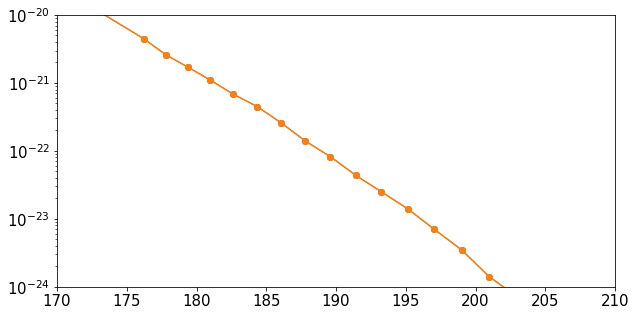

In [8]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize = [10,5])

ax.plot(wav_tot,xs_tot,'o-',lw=1)
ax.plot(wav_old,xs_old,'o-')

ax.set_xlim(170,210)
ax.set_ylim(1e-24,1e-20)

ax.set_yscale('log')


plt.show()

'HS'

In [51]:
import subprocess
subprocess.call('mkdir '+sp,shell=True)

fil = open(sp+'/'+sp+'_xs.txt','w')
fil.write(sp+' (wavelength = nm, xs = cm2/molecule)\n')
fil.write('wavelength          300K                \n')

for i in range(len(wav_tot)):
    fil.write('{:20}'.format('%.8e'%wav_tot[i]))
    fil.write('{:20}'.format('%.8e'%xs_tot[i])+'\n')

fil.close()

In [9]:
fil = open('Zahnle_Kevin_data/zahnle_earth_photos.yaml','r')
rxs = yaml.load(fil)
fil.close()


In [10]:
paths = []
for rx in rxs:
    if rx['equation'].split()[0]==sp:
        paths.append(rx['equation'])
qy_names = []
for path in paths:
    qy_names.append(path.replace(' ','_')+'.txt')
    
print(qy_names)

['CO2_+_hv_=>_CO_+_O.txt', 'CO2_+_hv_=>_CO_+_O1D.txt']


In [54]:

i = 1

fil = open(sp+'/'+qy_names[i],'w')
fil.write(qy_names[i]+'\n')
fil.write('wavelength          300K                \n')

# for i in range(len(wav_tot)):

fil.write('{:20}'.format('%.8e'%wav_tot[0]))
fil.write('{:20}'.format('%.8e'%(1.00))+'\n')

fil.write('{:20}'.format('%.8e'%wav_tot[-1]))
fil.write('{:20}'.format('%.8e'%(1.00))+'\n')

fil.close()

In [11]:

import os
photospec = []
for rx in rxs:
    photospec.append(rx['equation'].split()[0])


directories = [a for a in os.listdir() if os.path.isdir(a) and a[0]!='.']
try:
    directories.remove('__pycache__')
except:
    pass

set(photospec).symmetric_difference(set(directories))

{'HNO', 'HNO2', 'Zahnle_Kevin_data'}